In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
df = pd.read_csv("daily_weather.csv")
df.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [12]:
df.isnull().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [14]:
df[df.isnull().any(axis=1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


## Data Cleaning

In [16]:
del df["number"]

In [17]:
df.head(3)

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000


In [19]:
df.shape[0]

1095

In [20]:
df = df.dropna()

In [22]:
df.shape[0]

1064

In [23]:
df.isnull().sum()

air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [24]:
df1 = df.copy()

In [25]:
df1['high_humidity_label'] = (df1['relative_humidity_3pm'] > 24.99)*1 # Binarize relative_humidity_3pm 0 or 1

In [28]:
df1.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity_label
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1


In [30]:
y=df1[['high_humidity_label']].copy()
y.head(5)

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [33]:
features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am']

In [35]:
X = df1[features].copy()

In [36]:
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am'],
      dtype='object')

In [37]:
y.columns

Index(['high_humidity_label'], dtype='object')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# KNN

In [39]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
y_pred = knn_model.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

0.7613636363636364

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       179
           1       0.78      0.72      0.75       173

    accuracy                           0.76       352
   macro avg       0.76      0.76      0.76       352
weighted avg       0.76      0.76      0.76       352



### Model Tuning

In [44]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [45]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.7992175273865414
En iyi parametreler: {'n_neighbors': 1}


In [48]:
knn = KNeighborsClassifier(n_neighbors=1)
knn_tuned = knn.fit(X_train, y_train)

In [49]:
knn_tuned.score(X_test, y_test)

0.8096590909090909

In [50]:
y_pred = knn_tuned.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.8096590909090909

# SVC

In [52]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [53]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
y_pred = svm_model.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

0.7784090909090909

### Model Tuning

In [56]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 14.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [57]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 4}


In [66]:
svc_tuned = SVC(kernel = "linear", C = 4).fit(X_train, y_train)

In [67]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7755681818181818

# RBF SVC

In [60]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [61]:
svc_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6988636363636364

### Model Tuning

In [63]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [64]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   10.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [65]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.001}


In [68]:
svc_tuned = SVC(C = 10, gamma = 0.001).fit(X_train, y_train)

In [69]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7982954545454546

# Random Forests

In [70]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [71]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8323863636363636

### Model Tuning

In [74]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [75]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [76]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [77]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 1000}


### Model Tuning

In [78]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 5, 
                                  min_samples_split = 5,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8181818181818182

# Gradient Boosting Machines

In [80]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [81]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8153409090909091

### Model Tuning

In [82]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [83]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [84]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [85]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [86]:
gbm = GradientBoostingClassifier(learning_rate = 0.05, 
                                 max_depth = 5,
                                min_samples_split = 5,
                                n_estimators = 100)

In [87]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [88]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8323863636363636

# XGBoost

In [89]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [90]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8181818181818182

### Model Tuning

In [100]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05]}
        

In [101]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [102]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 381 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1029 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1474 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  6.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             

In [103]:
xgb_cv_model.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}

In [104]:
xgb = XGBClassifier(learning_rate = 0.05, 
                    max_depth = 6,
                    n_estimators = 100,
                    subsample = 0.8)

In [105]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [106]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7954545454545454

# LightGBM

In [107]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [108]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8096590909090909

### Model Tuning

In [110]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [111]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

In [112]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 262 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 585 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1333 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1906 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2465 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 3108 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 3869 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 4728 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 5673 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 13.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'ma

In [113]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_samples': 5,
 'n_estimators': 2000,
 'subsample': 0.6}

In [114]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 6,
                       subsample = 0.6,
                       n_estimators = 2000,
                       min_child_samples = 5)

In [115]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [116]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8068181818181818

# Comparison Of Models

In [128]:
modeller = [
    knn_tuned,
    svc_tuned,
    rf_tuned,
    gbm_tuned,
    lgbm_tuned,
    xgb_tuned
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 80.9659%
----------------------------
SVC:
Accuracy: 79.8295%
----------------------------
RandomForestClassifier:
Accuracy: 81.8182%
----------------------------
GradientBoostingClassifier:
Accuracy: 83.2386%
----------------------------
LGBMClassifier:
Accuracy: 80.6818%
----------------------------
XGBClassifier:
Accuracy: 79.5455%


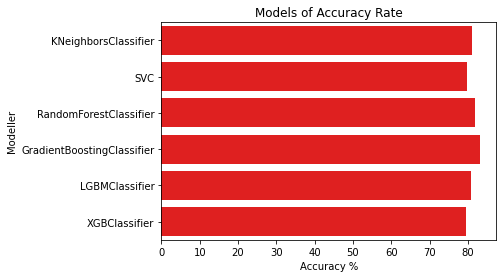

In [131]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Models of Accuracy Rate');    